# Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=[224,224]
#Train data(images) path
train_path='C:/Users/Prakash Nani/OneDrive/AIMLRepo/Untitled Folder/dataset/train'
#Test data(images) path
valid_path='C:/Users/Prakash Nani/OneDrive/AIMLRepo/Untitled Folder/dataset/test'

In [4]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
#dont train existing weights
for layer in vgg16.layers:
    layer.trainable=False

58889256/58889256 [==============================] - 4s 0us/step


In [9]:
x=Flatten()(vgg16.output)

prediction=Dense(len(folders),activation='softmax')(x)

In [5]:
folders=glob('C:/Users/Prakash Nani/OneDrive/AIMLRepo/Untitled Folder/dataset/train/*')

In [6]:
len(folders)

2

In [10]:
model=Model(inputs=vgg16.input,outputs=prediction)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Testing data augmentation (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training set
print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'C:/Users/Prakash Nani/OneDrive/AIMLRepo/Untitled Folder/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)

# Testing set
print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'C:/Users/Prakash Nani/OneDrive/AIMLRepo/Untitled Folder/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Training length:

Found 840 images belonging to 2 classes.
Test length:

Found 188 images belonging to 2 classes.


In [13]:
r=model.fit(training_set,
            validation_data=test_set,
            epochs=10,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set))

Epoch 1/10
27/27 [==============================] - 231s 9s/step - loss: 1.0004 - accuracy: 0.5619 - val_loss: 0.5865 - val_accuracy: 0.6596
Epoch 2/10
27/27 [==============================] - 223s 8s/step - loss: 0.6032 - accuracy: 0.7071 - val_loss: 0.4154 - val_accuracy: 0.8138
Epoch 3/10
27/27 [==============================] - 229s 9s/step - loss: 0.5093 - accuracy: 0.7512 - val_loss: 0.4411 - val_accuracy: 0.7926
Epoch 4/10
27/27 [==============================] - 221s 8s/step - loss: 0.5268 - accuracy: 0.7405 - val_loss: 0.4022 - val_accuracy: 0.8032
Epoch 5/10
27/27 [==============================] - 215s 8s/step - loss: 0.4439 - accuracy: 0.7857 - val_loss: 0.3477 - val_accuracy: 0.8404
Epoch 6/10
27/27 [==============================] - 222s 8s/step - loss: 0.4147 - accuracy: 0.8083 - val_loss: 0.3489 - val_accuracy: 0.8457
Epoch 7/10
27/27 [==============================] - 235s 9s/step - loss: 0.3809 - accuracy: 0.8286 - val_loss: 0.3886 - val_accuracy: 0.8298
Epoch 8/10
27

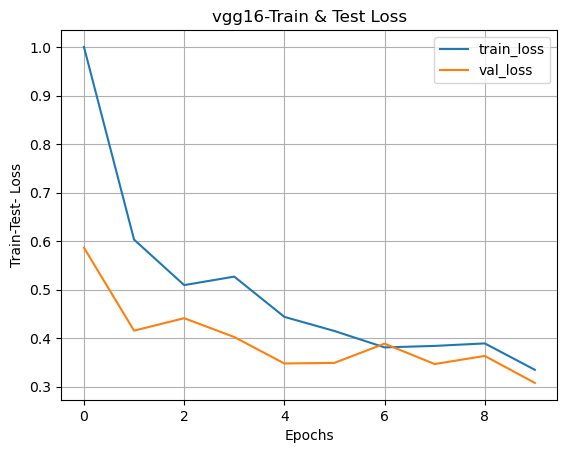

In [14]:
plt.title('vgg16-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()

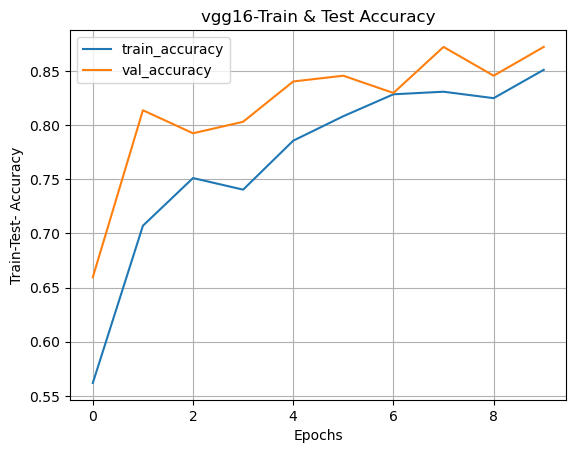

<Figure size 640x480 with 0 Axes>

In [15]:
plt.title('vgg16-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Accuracy & Val_accuracy')

In [16]:
import tensorflow as tf
from keras.models import load_model
model.save('VGG16_asian&african_classify.h5')

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.save('VGG16_classify.keras')

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['african','asian']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

6/6 [==============================] - 41s 7s/step
Confusion Matrix
[[47 50]
 [48 43]]
Classification Report
              precision    recall  f1-score   support

     african       0.49      0.48      0.49        97
       asian       0.46      0.47      0.47        91

    accuracy                           0.48       188
   macro avg       0.48      0.48      0.48       188
weighted avg       0.48      0.48      0.48       188

Accuracy Score
0.4787234042553192


<Axes: >

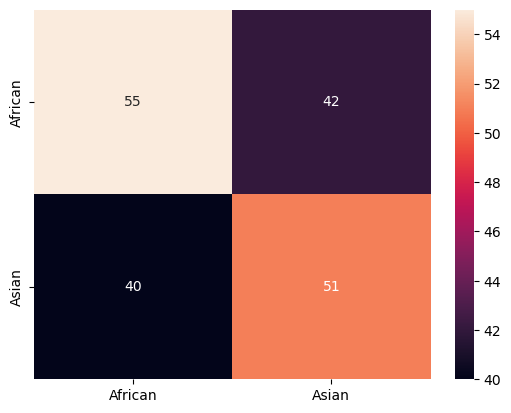

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['African','Asian'],
 yticklabels=['African','Asian'])

# Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'D:/seg_train'
valid_path = 'D:/seg_test'

In [3]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in inceptionv3.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 6s 0us/step


In [6]:
folder=glob('D:/seg_train/*')

In [7]:
len(folder)

3

In [9]:
x = Flatten()(inceptionv3.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [10]:
model = Model(inputs=inceptionv3.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'D:/seg_train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)

print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'D:/seg_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Training length:

Found 6866 images belonging to 3 classes.
Test length:

Found 1464 images belonging to 3 classes.


In [15]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=6,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/6
215/215 [==============================] - 660s 3s/step - loss: 0.2960 - accuracy: 0.9739 - val_loss: 0.0498 - val_accuracy: 0.9904
Epoch 2/6
215/215 [==============================] - 503s 2s/step - loss: 0.3100 - accuracy: 0.9809 - val_loss: 0.1373 - val_accuracy: 0.9911
Epoch 3/6
215/215 [==============================] - 445s 2s/step - loss: 0.2732 - accuracy: 0.9844 - val_loss: 0.8720 - val_accuracy: 0.9522
Epoch 4/6
215/215 [==============================] - 433s 2s/step - loss: 0.2142 - accuracy: 0.9879 - val_loss: 0.1994 - val_accuracy: 0.9877
Epoch 5/6
215/215 [==============================] - 471s 2s/step - loss: 0.2161 - accuracy: 0.9863 - val_loss: 0.1907 - val_accuracy: 0.9891
Epoch 6/6
215/215 [==============================] - 511s 2s/step - loss: 0.1483 - accuracy: 0.9918 - val_loss: 0.1150 - val_accuracy: 0.9932


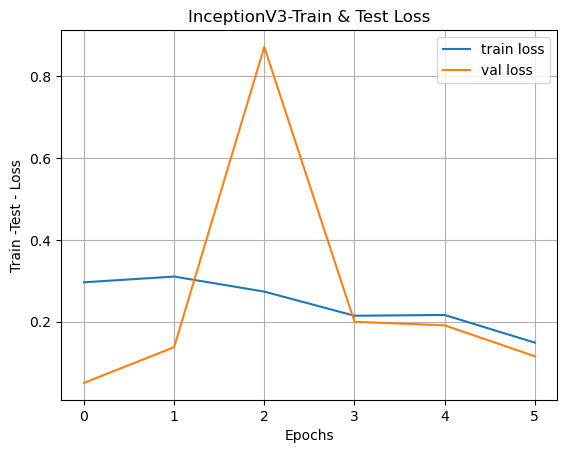

<Figure size 640x480 with 0 Axes>

In [16]:
plt.title('InceptionV3-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--LossVal_loss')

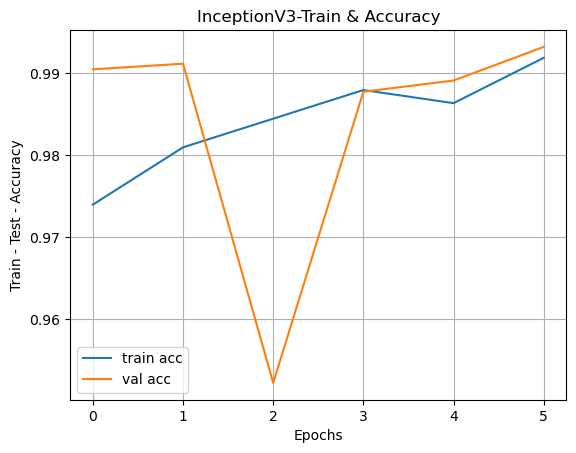

<Figure size 640x480 with 0 Axes>

In [17]:
plt.title('InceptionV3-Train & Accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train - Test - Accuracy')
plt.grid()
plt.show()
plt.savefig('InceptionV3 AccVal_acc')

In [18]:
import tensorflow as tf
from keras.models import load_model
model.save('InceptionV3model.h5')

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_set.classes)
steps = num_samples // batch_size
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'forest', 'glacier']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_32752\2064354508.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
[[129 145 163]
 [139 148 187]
 [170 181 202]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.29      0.30      0.29       437
      forest       0.31      0.31      0.31       474
     glacier       0.37      0.37      0.37       553

    accuracy                           0.33      1464
   macro avg       0.32      0.32      0.32      1464
weighted avg       0.33      0.33      0.33      1464



<Axes: >

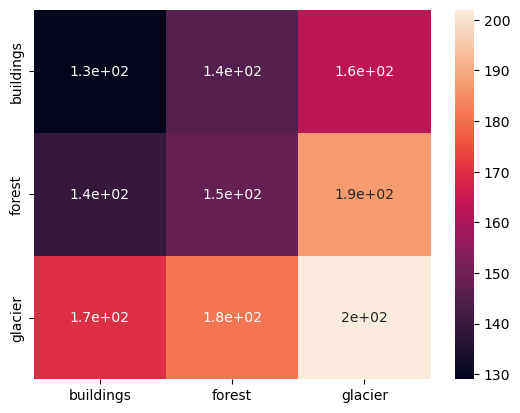

In [25]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['buildings', 'forest', 'glacier'],
            yticklabels=['buildings', 'forest', 'glacier'])

In [26]:
from keras.models import Model
from tensorflow.keras.applications import MobileNet

In [27]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


In [29]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(folder), activation='softmax')(x)

In [30]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [31]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'D:/seg_train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)

print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'D:/seg_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Training length:

Found 6866 images belonging to 3 classes.
Test length:

Found 1464 images belonging to 3 classes.


In [32]:
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [34]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/5
215/215 [==============================] - 263s 1s/step - loss: 0.3572 - accuracy: 0.9767 - val_loss: 0.1568 - val_accuracy: 0.9911
Epoch 2/5
215/215 [==============================] - 221s 1s/step - loss: 0.1900 - accuracy: 0.9885 - val_loss: 0.4042 - val_accuracy: 0.9734
Epoch 3/5
215/215 [==============================] - 227s 1s/step - loss: 0.1516 - accuracy: 0.9902 - val_loss: 0.1387 - val_accuracy: 0.9898
Epoch 4/5
215/215 [==============================] - 231s 1s/step - loss: 0.1116 - accuracy: 0.9934 - val_loss: 0.1869 - val_accuracy: 0.9925
Epoch 5/5
215/215 [==============================] - 227s 1s/step - loss: 0.1016 - accuracy: 0.9934 - val_loss: 0.3250 - val_accuracy: 0.9857


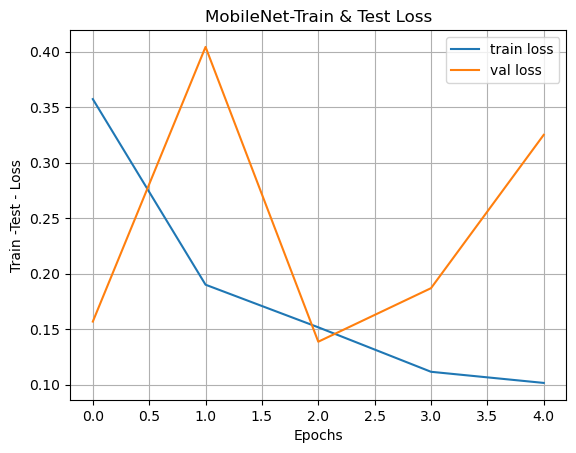

<Figure size 640x480 with 0 Axes>

In [35]:
plt.title('MobileNet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--LossVal_loss')

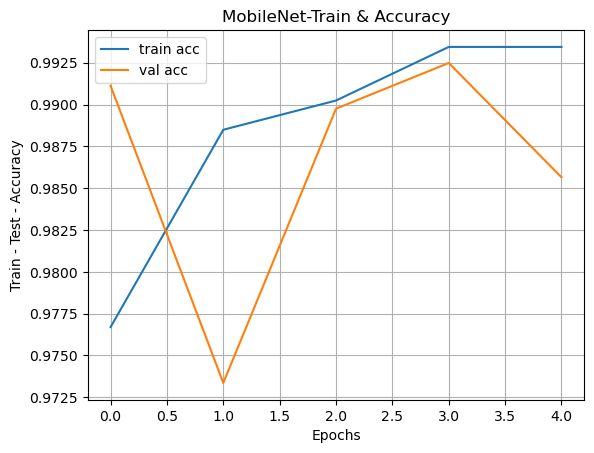

<Figure size 640x480 with 0 Axes>

In [36]:
plt.title('MobileNet-Train & Accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train - Test - Accuracy')
plt.grid()
plt.show()
plt.savefig('MobileNet AccVal_acc')

In [37]:
import tensorflow as tf
from keras.models import load_model
model.save('MobileNetmodel.h5')

C:\Users\Prakash Nani\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_set.classes)
steps = num_samples // batch_size
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'forest', 'glacier']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_32752\2064354508.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
[[141 138 158]
 [145 141 188]
 [161 194 198]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.32      0.32      0.32       437
      forest       0.30      0.30      0.30       474
     glacier       0.36      0.36      0.36       553

    accuracy                           0.33      1464
   macro avg       0.33      0.33      0.33      1464
weighted avg       0.33      0.33      0.33      1464



In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['buildings','sea','mountain','forest'],
            yticklabels=['buildings', 'forest', 'glacier'])